In [80]:
import skfem as fem
from skfem.quadrature import get_quadrature
from icecream import ic
from skfem.helpers import dot, grad
import numpy as np
import matplotlib.pyplot as plt

r_max = 10.0
m = fem.MeshLine(np.linspace(0, r_max, 91))
m_angmom = 0

e = fem.ElementLineP1()
#quadrature = get_quadrature(e, 6)
basis = fem.Basis(m, e)
ib = fem.InteriorBasis(m, e)
fb = fem.FacetBasis(m, e)

@fem.BilinearForm
def a(u, v, w):
    x = w.x[0]
    term1 = dot(grad(u),  grad(v)) * x
    term2 = 0.5 * u * (1.0 / x**2 * v)
    term3 = 0.5 * u *  (x**2 * v)
    return term1  + m_angmom**2 * term2 + term3
  
# Define the boundary condition
@fem.BilinearForm
def boundary_flux(u, v, w):
    ic(v.shape)
    x = w.x[0]
    #return u.grad[0][0] * v[0] -
    return u.grad[0] * v[0] * w.n


import numpy as np

@fem.BilinearForm
def b(u, v, w):
    x = w.x[0]
    return u * v * x






In [81]:
A = a.assemble(basis)
B = b.assemble(basis)
A += boundary_flux.assemble(fb)
#l = L.assemble(basis)



ic| v.shape: (2, 1)
ic| v.shape: (2, 1)
ic| v.shape: (2, 1)
ic| v.shape: (2, 1)


In [82]:
dofs = basis.get_dofs(m.facets_satisfying(lambda x: (x[0] == 0.0) | (x[0] == r_max)))
#D_right = basis.get_dofs(m.facets_satisfying(lambda x: x[0] == r_max))
#ic(D_left, D_right)
#AII, bI, xI, I = fem.condense(A, l, D=D)
A2, B2, xI, I = fem.condense(A, B, D=dofs)


In [83]:
from scipy.linalg import eigh
E, U = eigh(A2.todense(), B2.todense())

In [84]:
eigh(B.todense())[0]

array([8.70777240e-04, 7.14718235e-03, 1.42563169e-02, 2.13833806e-02,
       2.85111264e-02, 3.56389056e-02, 4.27666866e-02, 4.98944677e-02,
       5.70222488e-02, 6.41500299e-02, 7.12778110e-02, 7.84055921e-02,
       8.55333732e-02, 9.26611543e-02, 9.97889354e-02, 1.06916717e-01,
       1.14044498e-01, 1.21172279e-01, 1.28300060e-01, 1.35427841e-01,
       1.42555622e-01, 1.49683403e-01, 1.56811184e-01, 1.63938965e-01,
       1.71066746e-01, 1.78194528e-01, 1.85322309e-01, 1.92450090e-01,
       1.99577871e-01, 2.06705652e-01, 2.13833433e-01, 2.20961214e-01,
       2.28088995e-01, 2.35216776e-01, 2.42344557e-01, 2.49472339e-01,
       2.56600120e-01, 2.63727901e-01, 2.70855682e-01, 2.75940603e-01,
       2.77983463e-01, 2.85111244e-01, 2.92239026e-01, 2.99366810e-01,
       3.06494613e-01, 3.13622528e-01, 3.20751038e-01, 3.27882292e-01,
       3.35024190e-01, 3.42199803e-01, 3.49459757e-01, 3.56883148e-01,
       3.64554634e-01, 3.72535373e-01, 3.80854652e-01, 3.89520170e-01,
      

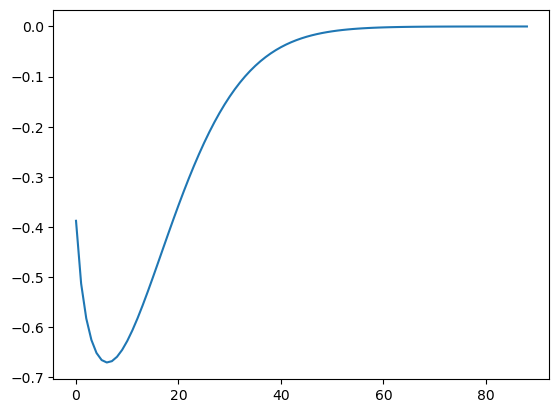

In [85]:
plt.figure()
plt.plot(U[:,0])
plt.show()

In [166]:
A2, B2 = fem.enforce(A, B, D=m.boundary_nodes())

In [167]:
E, U = eigh(A2.todense(), B2.todense())

LinAlgError: The leading minor of order 1 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

In [170]:
np.linalg.eigh(B2.todense())[0]

array([-1.22906202e-05,  0.00000000e+00,  6.41389051e-04,  1.28299753e-03,
        1.92450078e-03,  2.56600119e-03,  3.20750150e-03,  3.84900179e-03,
        4.49050209e-03,  5.13200239e-03,  5.77350269e-03,  6.41500299e-03,
        7.05650329e-03,  7.69800359e-03,  8.33950389e-03,  8.98100419e-03,
        9.62250449e-03,  1.02640048e-02,  1.09055051e-02,  1.15470054e-02,
        1.21885057e-02,  1.28300060e-02,  1.34715063e-02,  1.41130066e-02,
        1.47545069e-02,  1.53960072e-02,  1.60375075e-02,  1.66790078e-02,
        1.73205081e-02,  1.79620084e-02,  1.86035087e-02,  1.92450090e-02,
        1.98865093e-02,  2.05280096e-02,  2.11695099e-02,  2.18110102e-02,
        2.24525105e-02,  2.30940108e-02,  2.37355111e-02,  2.43770114e-02,
        2.50185117e-02,  2.56600120e-02,  2.63015123e-02,  2.69430126e-02,
        2.75845129e-02,  2.82260132e-02,  2.88675135e-02,  2.95090138e-02,
        3.01505141e-02,  3.07920144e-02,  3.14335147e-02,  3.20750150e-02,
        3.27165153e-02,  

In [171]:
m.boundary_nodes()

array([  0, 300])

In [181]:
fem.FacetBasis(m, e)

<skfem FacetBasis(MeshLine1, ElementLineP1) object>
  Number of elements: 2
  Number of DOFs: 301
  Size: 64 B

In [70]:
from skfem import *
from skfem.models.poisson import laplace, mass
from scipy.sparse.linalg import eigsh
import numpy as np

m = MeshLine(np.linspace(0, np.pi, 102))
e = ElementLineP1()

# Define the interior basis
ib = InteriorBasis(m, e)

# Define the facet basis for the boundary
fb = FacetBasis(m, e)

# Define the boundary condition
@BilinearForm
def boundary_flux(u, v, w):
    ic(u.grad.shape)
    print(v)
    return u.grad[0] * v[0] - u.grad[-1] * v[-1]
    return u.grad[0][0] * v[0] - u.grad[0][-1] * v[-1]

# Assemble the system
A = laplace.assemble(ib)
M = mass.assemble(ib)

# Apply the boundary condition
A += boundary_flux.assemble(fb)

# Find the Dirichlet dofs
dofs = ib.get_dofs(m.facets_satisfying(lambda x: (x[0] == 0) | (x[0] == np.pi)))

# Solve the system
A2, M2, _, _ = condense(A, M, D=dofs)


# Find the eigenvalues
vals, vecs = eigsh(A2, 5, M2, which='SM')

print(vals)

ic| u.grad.shape: (1, 2, 1)
ic| u.grad.shape: (1, 2, 1)
ic| u.grad.shape: (1, 2, 1)
ic| u.grad.shape: (1, 2, 1)


[[1.]
 [0.]]
[[0.]
 [1.]]
[[1.]
 [0.]]
[[0.]
 [1.]]
[9.17132689e-13 1.02701922e+00 4.10908979e+00 9.24925143e+00
 1.64525735e+01]


ic| vecs[:,0].shape: (100,)
ic| m.p[0].shape: (102,)


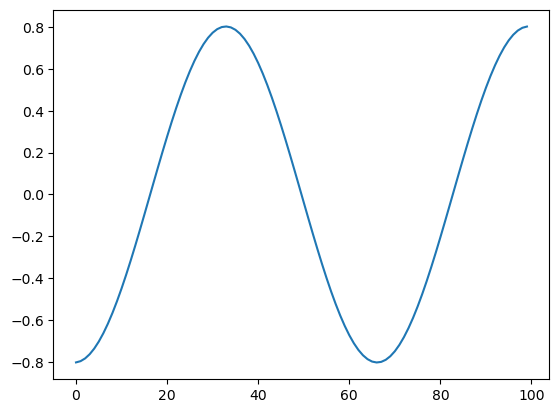

In [69]:
ic(vecs[:,0].shape)
ic(m.p[0].shape)
plt.figure()
plt.plot(vecs[:,3])
plt.show()

In [222]:
fb

<skfem FacetBasis(MeshLine1, ElementLineP1) object>
  Number of elements: 2
  Number of DOFs: 102
  Size: 64 B